# Some Important Points: 🔋 


1.   V(max) = 4.2 volt
2.   V(min) = 2.8/2.7 Volt
3.   Nominal Charge capacity = 2500 mA/2.5Ah 
4.   SOC = Normal Capacity at that point/Nominal capacity
5.   Nominal Capacity - ammount of charged deliverd by fully charge batter, when it is fresh. OR **we can say Total capacity of battery.**
6.   SOH = Maximum of SOC at one cycle.
7.   we can find SOH by making set of loops in dataset and then find max(SOC).


# Models 📌


1.   (DNN) Deep Neural Network 
2.   LSTM
3.   CNN
4.   GPR (Gaussian Progress Rregressor)
5.   Genetic Algorithms
6.   Support Vector Regressor
7.   Random Forest



# Model Partitioning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
import random

In [2]:
# Reading the data
df = pd.read_csv("trial1.csv")
df.head(5)

,Time/sec,Potential/V,Current/A,Charge/C,Capacity/Ah,Nominal_Capacity/Ah
0,0.4,3.54,1.25,0.00,0.0,2.5
1,1.0,3.54,1.25,0.95,0.0,2.5
2,2.0,3.54,1.25,2.28,0.0,2.5
3,3.0,3.55,1.25,3.46,0.0,2.5
4,4.0,3.55,1.25,4.64,0.0,2.5


In [3]:
df.rename(columns= {'Time/sec':'Time', 'Potential/V':'Potential', 'Current/A':'Current', 'Charge/C':'Charge',
                    'Capacity/Ah':'Capacity', 'Nominal_Capacity/Ah':'Nominal_Capacity'},inplace=True)

In [4]:
df.insert(loc = 6,column ='Energy',value=df['Capacity']*df["Potential"])

In [5]:
df.insert(loc = 7,column ='Power',value=df['Current']*df["Potential"])

In [6]:
df.insert(loc = 8,column ='SOC',value=df['Capacity']/df['Nominal_Capacity']) 

In [7]:
df.head()

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,Energy,Power,SOC
0,0.4,3.54,1.25,0.00,0.0,2.5,0.0,4.4250,0.0
1,1.0,3.54,1.25,0.95,0.0,2.5,0.0,4.4250,0.0
2,2.0,3.54,1.25,2.28,0.0,2.5,0.0,4.4250,0.0
3,3.0,3.55,1.25,3.46,0.0,2.5,0.0,4.4375,0.0
4,4.0,3.55,1.25,4.64,0.0,2.5,0.0,4.4375,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242885 entries, 0 to 242884
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Time              242885 non-null  float64
 1   Potential         242885 non-null  float64
 2   Current           242885 non-null  float64
 3   Charge            242885 non-null  float64
 4   Capacity          242885 non-null  float64
 5   Nominal_Capacity  242885 non-null  float64
 6   Energy            242885 non-null  float64
 7   Power             242885 non-null  float64
 8   SOC               242885 non-null  float64
dtypes: float64(9)
memory usage: 16.7 MB


In [9]:
df.isnull().count()

Time                242885
Potential           242885
Current             242885
Charge              242885
Capacity            242885
Nominal_Capacity    242885
Energy              242885
Power               242885
SOC                 242885
dtype: int64

In [10]:
df.describe()

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,Energy,Power,SOC
count,242885.000000,242885.000000,242885.000000,242885.000000,242885.000000,242885.0,242885.000000,242885.000000,242885.000000
mean,124950.840426,3.839404,0.034547,5083.012369,1.412284,2.5,5.702908,0.394564,0.564913
std,72231.050997,0.385144,1.234725,3185.178306,0.884470,0.0,3.763641,4.354979,0.353788
min,0.400000,2.750000,-2.500000,0.000000,0.000000,2.5,0.000000,-9.650000,0.000000
25%,62490.800000,3.440000,0.000000,1920.000000,0.530000,2.5,1.895000,0.000000,0.212000
50%,124983.000000,3.940000,0.080000,5790.000000,1.610000,2.5,6.181200,0.336000,0.644000
75%,187475.100000,4.200000,1.250000,8280.000000,2.300000,2.5,9.660000,4.662500,0.920000
max,249967.200000,4.200000,1.260000,8680.000000,2.410000,2.5,10.122000,5.292000,0.964000


# Normalizing the Values 

In [11]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Time','Potential','Current','Charge','Capacity','Nominal_Capacity','Energy','Power'] # Not Normalizing the Y(target Variable) - which is SOC
df[numericals] = scaler.fit_transform(df[numericals])

In [12]:
df.head()

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,Energy,Power,SOC
0,0.000000,0.544828,0.99734,0.000000,0.0,0.0,0.0,0.941976,0.0
1,0.000002,0.544828,0.99734,0.000109,0.0,0.0,0.0,0.941976,0.0
2,0.000006,0.544828,0.99734,0.000263,0.0,0.0,0.0,0.941976,0.0
3,0.000010,0.551724,0.99734,0.000399,0.0,0.0,0.0,0.942812,0.0
4,0.000014,0.551724,0.99734,0.000535,0.0,0.0,0.0,0.942812,0.0


In [13]:
df.describe()

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,Energy,Power,SOC
count,242885.000000,242885.000000,242885.000000,242885.000000,242885.000000,242885.0,242885.000000,242885.000000,242885.000000
mean,0.499868,0.751313,0.674082,0.585601,0.586010,0.0,0.563417,0.672237,0.564913
std,0.288963,0.265617,0.328384,0.366956,0.367000,0.0,0.371828,0.291459,0.353788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.249995,0.475862,0.664894,0.221198,0.219917,0.0,0.187216,0.645831,0.212000
50%,0.499997,0.820690,0.686170,0.667051,0.668050,0.0,0.610670,0.668317,0.644000
75%,0.749998,1.000000,0.997340,0.953917,0.954357,0.0,0.954357,0.957870,0.920000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.964000


# Spliting the Data into train and test

In [14]:
Y = df.pop('SOC')
X = df

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [16]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((194308, 8), (48577, 8), (194308,), (48577,))

In [17]:
def plot_his(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

# DNN

## Model 1
Normal Deep earning neural network
with 3 layers and relu activation

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(50, activation='relu'),
                               tf.keras.layers.Dense(20, activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["mae"])

history_1 = model_1.fit(X_train,Y_train, epochs= 10)

Epoch 1/10
6073/6073 [==============================] - 17s 2ms/step - loss: 0.0059 - mae: 0.0059
Epoch 2/10
6073/6073 [==============================] - 15s 3ms/step - loss: 0.0027 - mae: 0.0027
Epoch 3/10
6073/6073 [==============================] - 14s 2ms/step - loss: 0.0023 - mae: 0.0023
Epoch 4/10
6073/6073 [==============================] - 14s 2ms/step - loss: 0.0020 - mae: 0.0020
Epoch 5/10
6073/6073 [==============================] - 14s 2ms/step - loss: 0.0019 - mae: 0.0019
Epoch 6/10
6073/6073 [==============================] - 14s 2ms/step - loss: 0.0017 - mae: 0.0017
Epoch 7/10
6073/6073 [==============================] - 15s 3ms/step - loss: 0.0016 - mae: 0.0016
Epoch 8/10
6073/6073 [==============================] - 15s 2ms/step - loss: 0.0015 - mae: 0.0015
Epoch 9/10
6073/6073 [==============================] - 14s 2ms/step - loss: 0.0015 - mae: 0.0015
Epoch 10/10
6073/6073 [==============================] - 14s 2ms/step - loss: 0.0014 - mae: 0.0014


In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                450       
                                                                 
 dense_7 (Dense)             (None, 20)                1020      
                                                                 
 dense_8 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.evaluate(X_test,Y_test)

1519/1519 [==============================] - 3s 2ms/step - loss: 8.0088e-04 - mae: 8.0088e-04


[0.0008008801960386336, 0.0008008801960386336]

In [ ]:
prediction = model_1.predict(X_test)
print(prediction[:10])

1519/1519 [==============================] - 3s 2ms/step
[[0.20115979]
 [0.07608561]
 [0.94474053]
 [0.37221852]
 [0.0053605 ]
 [0.93250763]
 [0.9277519 ]
 [0.95632905]
 [0.9563412 ]
 [0.64807296]]


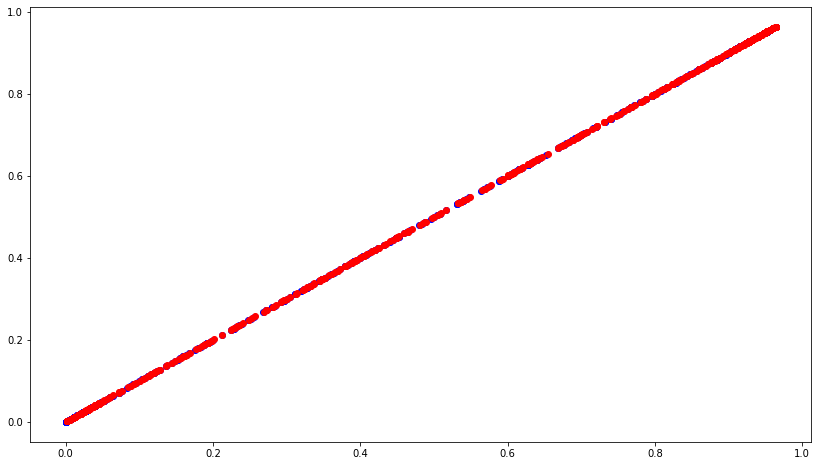

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction[300:900], prediction[300:900], color='red')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

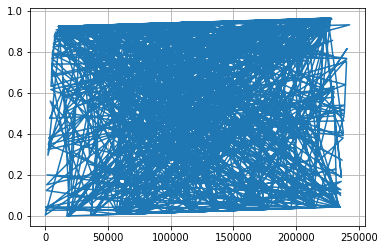

In [ ]:
plt.plot(Y_test[200:900])
plt.grid(True)
plt.show

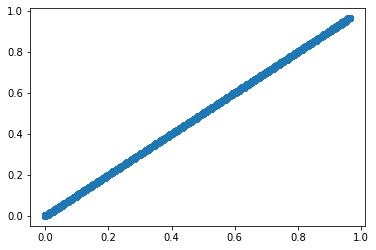

In [ ]:
plt.scatter(Y_test,prediction)

# LSTM
LSTM ( Long short term memory)


## Model 2

In [ ]:
%%time
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.LSTM(50,activation= 'relu',return_sequences=True, input_shape=(8,1),dropout=0.3),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ['mae'])

history_2 = model_2.fit(X_train,Y_train,epochs=10)

Epoch 1/10
6073/6073 [==============================] - 191s 31ms/step - loss: 0.0282 - mae: 0.0282
Epoch 2/10
6073/6073 [==============================] - 187s 31ms/step - loss: 0.0143 - mae: 0.0143
Epoch 3/10
6073/6073 [==============================] - 187s 31ms/step - loss: 0.0125 - mae: 0.0125
Epoch 4/10
6073/6073 [==============================] - 188s 31ms/step - loss: 0.0111 - mae: 0.0111
Epoch 5/10
6073/6073 [==============================] - 189s 31ms/step - loss: 0.0103 - mae: 0.0103
Epoch 6/10
6073/6073 [==============================] - 197s 32ms/step - loss: 0.0094 - mae: 0.0094
Epoch 7/10
6073/6073 [==============================] - 198s 33ms/step - loss: 0.0091 - mae: 0.0091
Epoch 8/10
6073/6073 [==============================] - 198s 33ms/step - loss: 0.0085 - mae: 0.0085
Epoch 9/10
6073/6073 [==============================] - 201s 33ms/step - loss: 0.0082 - mae: 0.0082
Epoch 10/10
6073/6073 [==============================] - 197s 33ms/step - loss: 0.0083 - mae: 0.0083

In [ ]:
model_2.evaluate(X_test,Y_test)

1519/1519 [==============================] - 7s 5ms/step - loss: 0.1721 - mae: 0.1721


[0.17209278047084808, 0.17209278047084808]

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 8, 50)             10400     
                                                                 
 lstm_3 (LSTM)               (None, 10)                2440      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
prediction_2 = model_2.predict(X_test)
print(prediction_2[:20])

1519/1519 [==============================] - 7s 4ms/step
[[0.11406583]
 [0.56721485]
 [0.5362625 ]
 [0.31515515]
 [0.28905365]
 [0.52688825]
 [0.08755141]
 [0.56352663]
 [0.04244122]
 [0.61956114]
 [0.5780682 ]
 [0.00098458]
 [0.66091406]
 [0.11652717]
 [0.6422496 ]
 [0.12333548]
 [0.41474602]
 [0.00657138]
 [0.07346886]
 [0.00910398]]


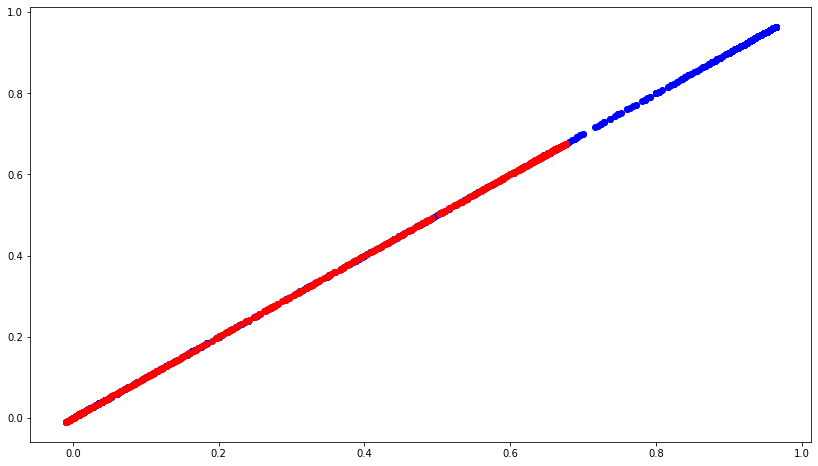

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction_2[300:900], prediction_2[300:900], color='red')
plt.show()

## Model 3

In [ ]:
%%time
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.LSTM(20,activation= 'relu',return_sequences=True, input_shape=(8,1),dropout=0.3),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['mae'])

history_3 = model_3.fit(X_train,Y_train,epochs=6)

Epoch 1/6
6073/6073 [==============================] - 206s 34ms/step - loss: 0.0826 - mae: 0.0826
Epoch 2/6
6073/6073 [==============================] - 204s 34ms/step - loss: 0.0285 - mae: 0.0285
Epoch 3/6
6073/6073 [==============================] - 206s 34ms/step - loss: 0.0215 - mae: 0.0215
Epoch 4/6
6073/6073 [==============================] - 206s 34ms/step - loss: 0.0191 - mae: 0.0191
Epoch 5/6
6073/6073 [==============================] - 206s 34ms/step - loss: 0.0174 - mae: 0.0174
Epoch 6/6
6073/6073 [==============================] - 204s 34ms/step - loss: 0.0162 - mae: 0.0162
CPU times: user 27min 50s, sys: 3min 35s, total: 31min 26s
Wall time: 20min 32s


In [ ]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 8, 20)             1760      
                                                                 
 lstm_3 (LSTM)               (None, 10)                1240      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3,011
Trainable params: 3,011
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.evaluate(X_test,Y_test)

1519/1519 [==============================] - 7s 5ms/step - loss: 0.1460 - mae: 0.1460


[0.1460295170545578, 0.1460295170545578]

Text(0.5, 1.0, 'LSTM-Error')

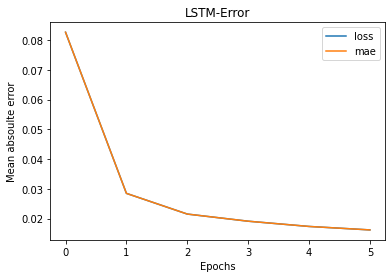

In [ ]:
pd.DataFrame(history_3.history).plot()
plt.ylabel("Mean absoulte error")
plt.xlabel("Epochs")
plt.title("LSTM-Error")

In [ ]:
prediction_3 = model_3.predict(X_test)
print(prediction_3[:20])

1519/1519 [==============================] - 6s 4ms/step
[[0.20028435]
 [0.7039334 ]
 [0.25026488]
 [0.660453  ]
 [0.38282233]
 [0.7128551 ]
 [0.6007756 ]
 [0.67457634]
 [0.6786955 ]
 [0.02930216]
 [0.08112739]
 [0.66751146]
 [0.26617503]
 [0.52348256]
 [0.71193403]
 [0.07630853]
 [0.68016285]
 [0.6991308 ]
 [0.6403023 ]
 [0.709634  ]]


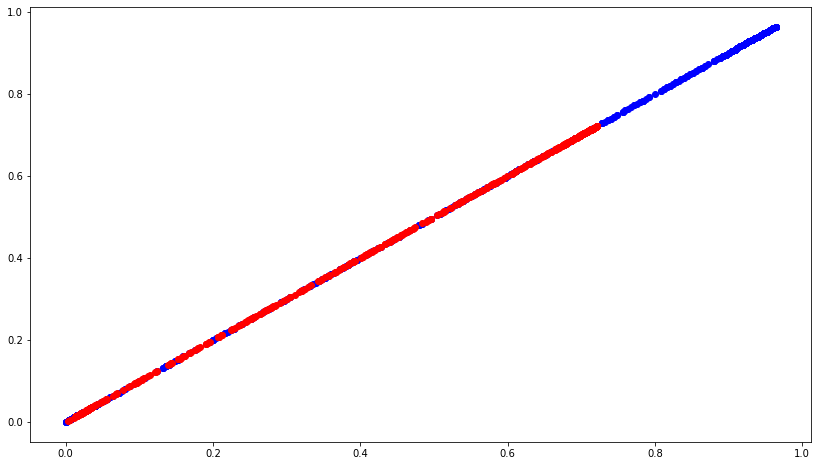

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction_3[300:900], prediction_3[300:900], color='red')
plt.show()

# CNN

## Model 4
CNN

In [ ]:
model_4 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,3,activation='relu',input_shape=(8,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1,activation='relu')])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['mae'])

history_4 = model_4.fit(X_train,Y_train,epochs=5)

Epoch 1/5
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0058 - mae: 0.0058
Epoch 2/5
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0017 - mae: 0.0017
Epoch 3/5
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0016 - mae: 0.0016
Epoch 4/5
6073/6073 [==============================] - 11s 2ms/step - loss: 0.0015 - mae: 0.0015
Epoch 5/5
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0014 - mae: 0.0014


In [ ]:
model_4.evaluate(X_test,Y_test)

1519/1519 [==============================] - 2s 1ms/step - loss: 0.0015 - mae: 0.0015


[0.0014545790618285537, 0.0014545790618285537]

In [ ]:
prediction_4 = model_4.predict(X_test)
print(prediction_4[:20])

1519/1519 [==============================] - 3s 2ms/step
[[0.9024275 ]
 [0.8773483 ]
 [0.01341522]
 [0.38146585]
 [0.8082183 ]
 [0.92450565]
 [0.02963302]
 [0.59323287]
 [0.94910204]
 [0.03839782]
 [0.93333215]
 [0.1650593 ]
 [0.02179254]
 [0.12973557]
 [0.84140164]
 [0.91846246]
 [0.7973091 ]
 [0.80786735]
 [0.02962977]
 [0.82909   ]]


Text(0.5, 1.0, 'CNN-Loss')

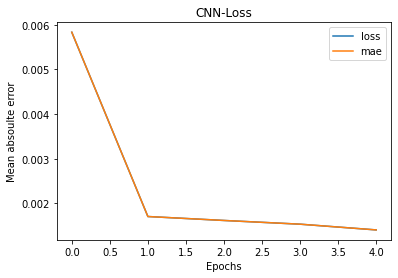

In [ ]:
pd.DataFrame(history_4.history).plot()
plt.ylabel("Mean absoulte error")
plt.xlabel("Epochs")
plt.title("CNN-Loss")

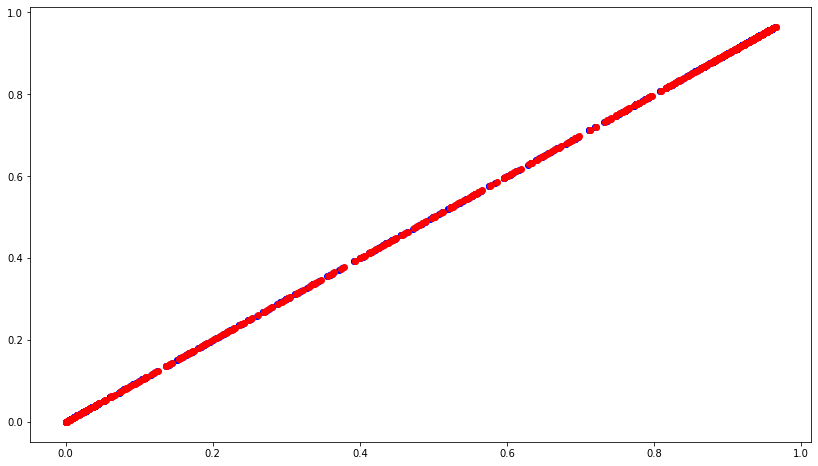

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction_4[300:900], prediction_4[300:900], color='red')
plt.show()

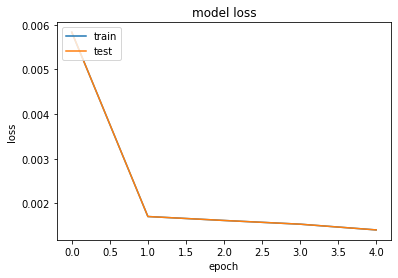

In [ ]:
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['mae'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Model 5

In [ ]:
model_5 = tf.keras.Sequential([tf.keras.layers.Conv1D(3,3,activation='relu',input_shape=(8,1)),
                               tf.keras.layers.Conv1D(3,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1,activation='relu')])

model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mae'])

history_5 = model_5.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0071 - mae: 0.0071 - val_loss: 0.0038 - val_mae: 0.0038
Epoch 2/10
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0043 - mae: 0.0043 - val_loss: 0.0035 - val_mae: 0.0035
Epoch 3/10
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0044 - mae: 0.0044 - val_loss: 0.0028 - val_mae: 0.0028
Epoch 4/10
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0042 - mae: 0.0042 - val_loss: 0.0148 - val_mae: 0.0148
Epoch 5/10
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0042 - mae: 0.0042 - val_loss: 0.0037 - val_mae: 0.0037
Epoch 6/10
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0038 - mae: 0.0038 - val_loss: 0.0035 - val_mae: 0.0035
Epoch 7/10
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0040 - mae: 0.0040 - val_loss: 0.0021 - val_mae: 0.0021
Epoch 8/10
6073/6073 [==============================] -

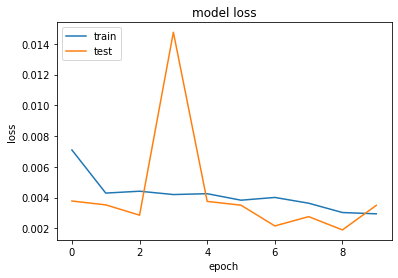

In [ ]:
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
prediction_5 = model_5.predict(X_test)


1519/1519 [==============================] - 2s 1ms/step


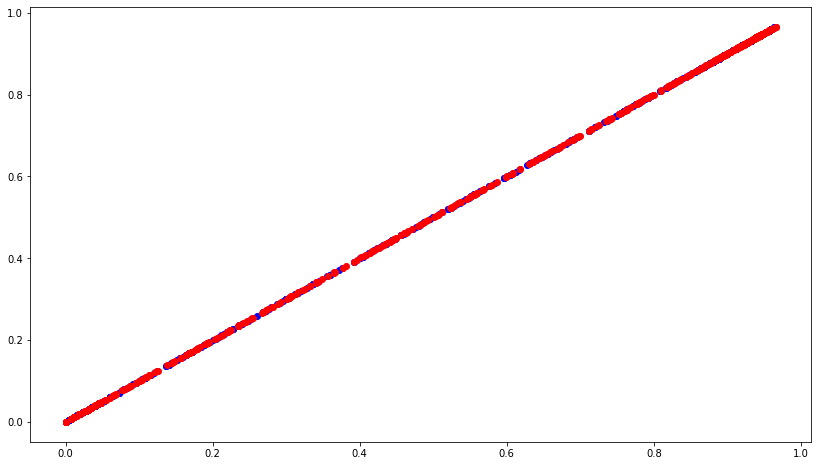

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction_5[300:900], prediction_5[300:900], color='red')
plt.show()

## Model 6

In [30]:
%%time
model_6 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,3,activation='relu',input_shape=(8,1)),
                               tf.keras.layers.Conv1D(10,2,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(16,activation="relu"),
                               tf.keras.layers.Dense(1)])

model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['mae'])

history_6 = model_6.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
6073/6073 [==============================] - 22s 3ms/step - loss: 0.0056 - mae: 0.0056 - val_loss: 0.0029 - val_mae: 0.0029
Epoch 2/100
6073/6073 [==============================] - 21s 3ms/step - loss: 0.0024 - mae: 0.0024 - val_loss: 0.0042 - val_mae: 0.0042
Epoch 3/100
6073/6073 [==============================] - 21s 3ms/step - loss: 0.0022 - mae: 0.0022 - val_loss: 0.0024 - val_mae: 0.0024
Epoch 4/100
6073/6073 [==============================] - 21s 3ms/step - loss: 0.0020 - mae: 0.0020 - val_loss: 5.5763e-04 - val_mae: 5.5763e-04
Epoch 5/100
6073/6073 [==============================] - 21s 3ms/step - loss: 0.0018 - mae: 0.0018 - val_loss: 0.0040 - val_mae: 0.0040
Epoch 6/100
6073/6073 [==============================] - 21s 3ms/step - loss: 0.0018 - mae: 0.0018 - val_loss: 0.0025 - val_mae: 0.0025
Epoch 7/100
6073/6073 [==============================] - 21s 3ms/step - loss: 0.0016 - mae: 0.0016 - val_loss: 0.0014 - val_mae: 0.0014
Epoch 8/100
6073/6073 [=================

In [24]:
model_6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 5, 10)             50        
                                                                 
 conv1d_3 (Conv1D)           (None, 4, 3)              63        
                                                                 
 flatten_1 (Flatten)         (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                416       
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 562
Trainable params: 562
Non-trainable params: 0
_________________________________________________________________


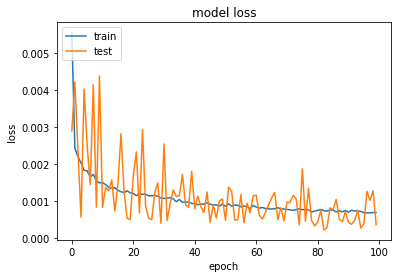

In [31]:
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1519/1519 [==============================] - 2s 2ms/step


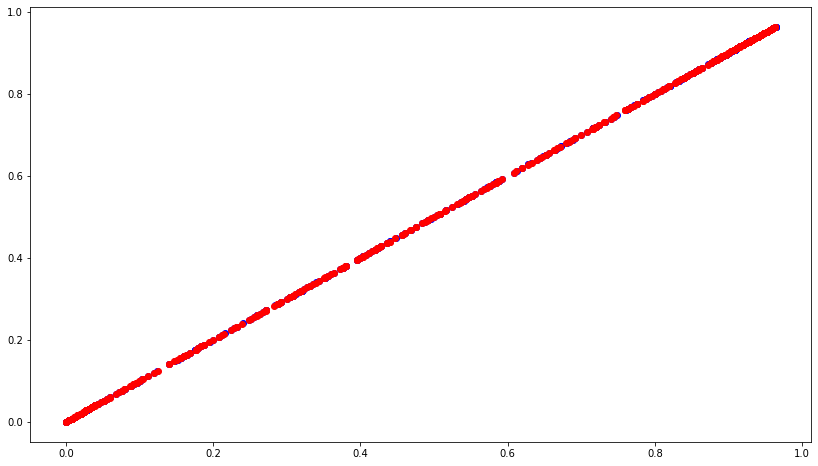

In [32]:
prediction_6 = model_6.predict(X_test)
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction_6[300:900], prediction_6[300:900], color='red')
plt.show()

## Model 7

In [54]:
%%time
model_7 = tf.keras.Sequential([tf.keras.layers.Conv1D(64,3,activation='relu',input_shape=(8,1)),
                               #tf.keras.layers.Dropout(0.2),
                               tf.keras.layers.Conv1D(32,2,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(16,activation="relu"),
                               tf.keras.layers.Dense(1)])

model_7.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['mae'])

history_7 = model_7.fit(X_train,Y_train,epochs=20,validation_data=(X_test,Y_test))

Epoch 1/20
6073/6073 [==============================] - 22s 4ms/step - loss: 0.0050 - mae: 0.0050 - val_loss: 0.0083 - val_mae: 0.0083
Epoch 2/20
6073/6073 [==============================] - 21s 4ms/step - loss: 0.0032 - mae: 0.0032 - val_loss: 0.0023 - val_mae: 0.0023
Epoch 3/20
6073/6073 [==============================] - 21s 3ms/step - loss: 0.0028 - mae: 0.0028 - val_loss: 0.0024 - val_mae: 0.0024
Epoch 4/20
6073/6073 [==============================] - 24s 4ms/step - loss: 0.0025 - mae: 0.0025 - val_loss: 0.0020 - val_mae: 0.0020
Epoch 5/20
6073/6073 [==============================] - 21s 3ms/step - loss: 0.0022 - mae: 0.0022 - val_loss: 0.0046 - val_mae: 0.0046
Epoch 6/20
6073/6073 [==============================] - 21s 3ms/step - loss: 0.0022 - mae: 0.0022 - val_loss: 0.0011 - val_mae: 0.0011
Epoch 7/20
6073/6073 [==============================] - 22s 4ms/step - loss: 0.0019 - mae: 0.0019 - val_loss: 0.0038 - val_mae: 0.0038
Epoch 8/20
6073/6073 [==============================] -

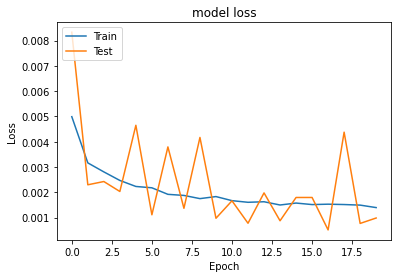

In [55]:
plot_his(history_7)

1519/1519 [==============================] - 2s 2ms/step


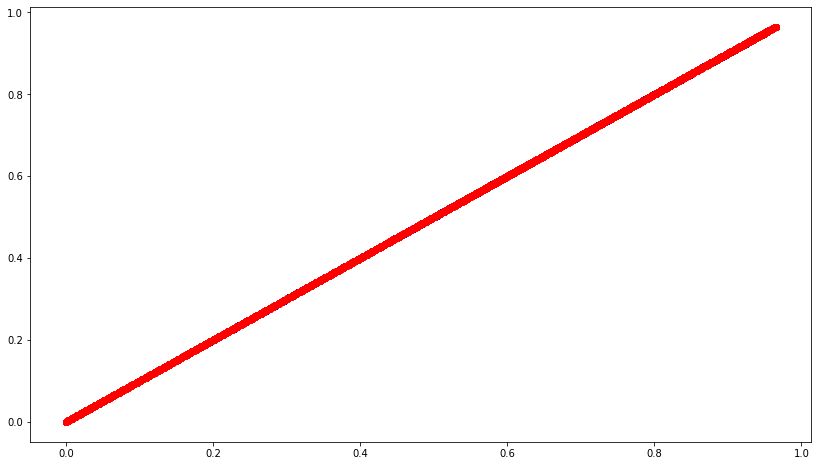

In [57]:
prediction_7 = model_7.predict(X_test)
plt.figure(figsize=(14,8))
plt.scatter(Y_test, Y_test, color='blue')
plt.scatter(prediction_7, prediction_7, color='red')
plt.show()

In [18]:
print('hello')

hello


# GPR
GAUSSIAN PROCESS REGRESSION
link - https://www.kaggle.com/code/residentmario/gaussian-process-regression-and-classification

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
clf = GaussianProcessRegressor(random_state=42)
clf.fit(X_train, Y_train)

In [ ]:
y_pred_one = clf.predict(X_test)